# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Высшее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Недвижимость', 'Управляющая компания', 'Торговля', 'ЧОП/Детективная д-ть', 'Химия/Парфюмерия/Фармацевтика', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Энергетика', 'Сельское хозяйство', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Сборочные производства', 'Развлечения/Искусство', 'Маркетинг', 'Нефтегазовая промышленность', 'Логистика', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Салоны красоты и здоровья', 'Образование', 'Подбор персонала', 'Информационные технологии', 'Здравоохранение', 'Строительство', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Наука', 'Другие сферы', 'Страхование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [15]:
# сколько записей имеют пустые поля
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

вывод: есть пустые поля, надо разбираться - что, куда и зачем
***
поизучаем поля поглубже (я мыслю, следовательно я - умный... и невероятно скромный)

In [16]:
# получим список полей с пропусками
nan_columns=df.columns[df.isnull().any()]
nan_columns

Index(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL',
       'JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME',
       'PREVIOUS_CARD_NUM_UTILIZED'],
      dtype='object')

In [17]:
# поглядим на пустышки более пристально и позже попробуем предположить, чем можем мы их заполнить
df[df.isnull().any(axis=1)][nan_columns]

,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,TP_PROVINCE,REGION_NM,WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
0,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,39.0,NaN
1,NaN,NaN,NaN,NaN,NaN,Орловская область,ЦЕНТРАЛЬНЫЙ 1,NaN,NaN
2,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,Коми,ЦЕНТРАЛЬНЫЙ 2,156.0,NaN
3,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,9.0,NaN
4,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,84.0,NaN
5,NaN,NaN,NaN,NaN,NaN,Кировская область,ПРИВОЛЖСКИЙ,NaN,NaN
6,Сборочные производства,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Курганская область,УРАЛЬСКИЙ,444.0,NaN
7,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Томская область,ЗАПАДНО-СИБИРСКИЙ,144.0,NaN
8,NaN,NaN,NaN,NaN,NaN,Омская область,ЗАПАДНО-СИБИРСКИЙ,NaN,NaN
9,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Вспомогательный техперсонал,Оренбургская область,ПОВОЛЖСКИЙ,36.0,NaN


поехали предполагать и всячески фантазировать. 
***
__GEN_INDUSTRY__ у нас есть "отрасль работы клиента". Почему может быть не указано? Полагаю, что при вводе анкеты поле не было обязательным и оператор банально забил на это. У нас есть варианты: существующий "Другие сферы" или добавить новое значение. Полагаю, что если поле не было задано, это несущественный фактор и я буду ипользовать в этом поле значение __Неизвестная сфера__   

__GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR__. Взгляд на должность, форму собственности, участие капитала и направление деятельности внутри нам подсказывает, что NaN в этих полях весьма повторяем и симптоматичен. Это или ленивый оператор или человек не удосужился сообщить данные. Поэтому тут сложно предполагать что-либо и я буду использовать __Неизвестная должность, Неизвестная форма собственности, Неизвестное участие капитала, Неизвестное направление деятельности__ соответственно. Да, мы можем тут ввести нуль для всех этих значений, но интереснее будет иметь все же "кривое", но осмысленное значение, чем просто не уникальный нуль. Впрочем у нас есть еще и пенсы, однако нехай...   

__TP_PROVINCE__ мудрить не буду. Вероятнее всего человек пользовался услугами банка в месте фактического проживания ("где карточку оформляли, туда и идите!"). Таким образом поле будет заполнено значением из __FACT_ADDRESS_PROVINCE__   
   
__REGION_NM__ по счастливой (а что, блин, если нет?) случайности у нас пустой только для двух записей. Сопоставим 
FACT_ADDRESS_PROVINCE и REGION_NM для Новосибирской области (поскольку пустышки относятся к ней)    
`set(df['REGION_NM'][(df.REG_ADDRESS_PROVINCE == 'Новосибирская область') & (~df.REGION_NM.isnull()) ])`   
Выяснилось, что для всех записей, где регион не пустой и клиент находится в Новосибирской области, у нас получается  __ЗАПАДНО-СИБИРСКИЙ__  регион

__WORK_TIME__ у нас очень сочетается с пустотой в описании работы клиента и полями SOCSTATUS_WORK_FL, SOCSTATUS_PENS_FL. Он или пенсионер, или не работает временно, может бездельник типа меня или данные не указаны по какой-либо причине. Не вижу проблемы в простановке нуля в пустые записи для этого поля.  

__PREVIOUS_CARD_NUM_UTILIZED__ - ну не было у него карт, ну и не надо. Нуль и вся недолга.   

Полагаю, таких изменений будет достаточно. Количество неуникальных значений велико, значит будем dummy кодирование пользовать без опасения безобразного распухания датафрейма.   
***

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Что есть категориальные признаки?  
___"Это любые признаки, значения которых нельзя сравнивать между собой и можно лишь проверять их равенство друг другу"___   
/ спёр определение из какой-то лекции, но оно звучит внятно, так что пуркуа бы и не па?

In [18]:
#Список категориальных признаков (на мой взгляд):   
categorial_feat_list = (['SOCSTATUS_WORK_FL','SOCSTATUS_PENS_FL',
                 'GENDER','EDUCATION','MARITAL_STATUS',
                 'GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME',
                 'REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM',
                 'REG_FACT_FL','FACT_POST_FL','REG_POST_FL','REG_FACT_POST_FL','REG_FACT_POST_TP_FL',
                 'FL_PRESENCE_FL','AUTO_RUS_FL','HS_PRESENCE_FL','COT_PRESENCE_FL','GAR_PRESENCE_FL','LAND_PRESENCE_FL',
                 'DL_DOCUMENT_FL','GPF_DOCUMENT_FL','FACT_PHONE_FL','REG_PHONE_FL'])

In [19]:
# еще раз посмотрим на них поближе (склероз - мое второе имя)
df[categorial_feat_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 31 columns):
SOCSTATUS_WORK_FL          30133 non-null int64
SOCSTATUS_PENS_FL          30133 non-null int64
GENDER                     30133 non-null int64
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               27420 non-null object
GEN_TITLE                  27420 non-null object
ORG_TP_STATE               27420 non-null object
ORG_TP_FCAPITAL            27425 non-null object
JOB_DIR                    27420 non-null object
FAMILY_INCOME              30133 non-null object
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_PROVINCE    30133 non-null object
TP_PROVINCE                29543 non-null object
REGION_NM                  30131 non-null object
REG_FACT_FL                30133 non-null int64
FACT_POST_FL               30133 non-null int64
REG_POST_FL   

Великолепно, кодировать надо не все категориальные признаки!

In [20]:
# переприсвоим переменной актуальный список 
categorial_feat_list = (['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])
#categorial_feat_list

Дополнительно не забываем про `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [21]:
# подготовим лист для замены запятой в числах столбцов
alter_comma_list = (['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'])

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [22]:
def preproc_data(df_input):
    df_output = df_input.copy()

    # let's spin!
    # удаляем AGREEMENT_RK 
    df_output.drop(['AGREEMENT_RK'], axis='columns', inplace=True)

    # заменяем запятую на точку в колонках
    alter_comma_list = (['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'])
    for item in alter_comma_list:
        df_output[item] = df_output[item].map(lambda x: x.replace(',', '.')).astype('float')
    
    # обрабатываем NaN в колонках
    # nan_columns=df.columns[df.isnull().any()]
    # ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL','JOB_DIR', 'TP_PROVINCE', 'REGION_NM', 'WORK_TIME','PREVIOUS_CARD_NUM_UTILIZED']
    # заполнители были декларированы выше
    df_output['GEN_INDUSTRY'].fillna('Неизвестная сфера', inplace=True)
    df_output['GEN_TITLE'].fillna('Неизвестная должность', inplace=True)
    df_output['ORG_TP_STATE'].fillna('Неизвестная форма собственности', inplace=True)
    df_output['ORG_TP_FCAPITAL'].fillna('Неизвестное участие капитала', inplace=True)
    df_output['JOB_DIR'].fillna('Неизвестное направление деятельности', inplace=True)
    df_output['TP_PROVINCE'].fillna(df['FACT_ADDRESS_PROVINCE'], inplace=True)
    #set(df['REGION_NM'][(df['REG_ADDRESS_PROVINCE'] == 'Новосибирская область') & (~df['REGION_NM'].isnull())])
    df_output['REGION_NM'].fillna('ЗАПАДНО-СИБИРСКИЙ', inplace=True)
    df_output['WORK_TIME'].fillna(0, inplace=True)    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0, inplace=True)        
    
    # закодируем категориальные признаки
    categorial_feat_list = (['EDUCATION','MARITAL_STATUS','GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','FAMILY_INCOME','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'])
    df_output = pd.get_dummies(df_output, columns = categorial_feat_list )

    return df_output

In [23]:
df_preproc = df.pipe(preproc_data)

In [24]:
# самопроверка на NaN в какой-либо колонке
df_preproc.isnull().sum()

TARGET                              0
AGE                                 0
SOCSTATUS_WORK_FL                   0
SOCSTATUS_PENS_FL                   0
GENDER                              0
CHILD_TOTAL                         0
DEPENDANTS                          0
PERSONAL_INCOME                     0
REG_FACT_FL                         0
FACT_POST_FL                        0
REG_POST_FL                         0
REG_FACT_POST_FL                    0
REG_FACT_POST_TP_FL                 0
FL_PRESENCE_FL                      0
OWN_AUTO                            0
AUTO_RUS_FL                         0
HS_PRESENCE_FL                      0
COT_PRESENCE_FL                     0
GAR_PRESENCE_FL                     0
LAND_PRESENCE_FL                    0
CREDIT                              0
TERM                                0
FST_PAYMENT                         0
DL_DOCUMENT_FL                      0
GPF_DOCUMENT_FL                     0
FACT_LIVING_TERM                    0
WORK_TIME   

In [25]:
# некоторые колонки скрытые, поэтому посчитаем общую сумму
df_preproc.isnull().sum().sum()

0

In [26]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 451 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), object(1), uint8(412)
memory usage: 20.8+ MB


In [27]:
# ага, у нас есть какой-то object datatype
df_preproc.select_dtypes(include=['object']).head()

,sample
0,test
1,test
2,test
3,test
4,test


In [28]:
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [29]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 450 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(412)
memory usage: 10.5 MB


In [30]:
df_test_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 450 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(412)
memory usage: 10.3 MB


Великолепно! AGREEMENT_RK удален, пустых значений нет, категориальные признаки закодированы, поле sample мы кикнули на наборах данных
***

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [31]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [32]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

было вообще весело, залип на дцать минут, пока не вспомнил, что такое вектор и допёр, что значит "отделить"
****

#### Задание 5. Обучение и оценка качества разных моделей

In [33]:
#from sklearn.cross_validation import train_test_split
#test_size=0.3, random_state=42

## Your Code Here
#cross_validation module is deprecated? well...
from sklearn.model_selection import train_test_split
#test_size=0.3, random_state=42
#train_test_split?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

bb_DTC = DecisionTreeClassifier()
#bb_DTC.fit(X, y, sample_weight=None, check_input=True, X_idx_sorted=None)
#bb_DTC.predict(X, check_input=True)
#bb_DTC.predict_proba(X, check_input=True)
bb_DTC.fit(X_train, y_train)
predict_DTC = bb_DTC.predict(X_test)
predict_proba_DTC = bb_DTC.predict_proba(X_test)

bb_RFC = RandomForestClassifier()
#bb_RFC.fit(X, y, sample_weight=None)
#bb_RFC.predict(X)
#bb_RFC.predict_proba(X)
bb_RFC.fit(X_train, y_train)
predict_RFC = bb_RFC.predict(X_test)
predict_proba_RFC = bb_RFC.predict_proba(X_test)

bb_LR = LogisticRegression()
#bb_LR.fit(X, y, sample_weight=None)
#bb_LR.predict(X)
#bb_LR.predict_proba(X)
bb_LR.fit(X_train, y_train)
predict_LR = bb_LR.predict(X_test)
predict_proba_LR = bb_LR.predict_proba(X_test)

#print(predict_proba_LR)
#print(predict_proba_LR[:,1])

In [35]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

# accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
# precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
# recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

DTC_accuracy_score = accuracy_score(y_test, predict_DTC)
DTC_precision_score = precision_score(y_test, predict_DTC)
DTC_recall_score = recall_score(y_test, predict_DTC)
DTC_scores = [DTC_accuracy_score,DTC_precision_score,DTC_recall_score]

RFC_accuracy_score = accuracy_score(y_test, predict_RFC)
RFC_precision_score = precision_score(y_test, predict_RFC)
RFC_recall_score = recall_score(y_test, predict_RFC)
RFC_scores = [RFC_accuracy_score,RFC_precision_score,RFC_recall_score]

LR_accuracy_score = accuracy_score(y_test, predict_LR)
LR_precision_score = precision_score(y_test, predict_LR)
LR_recall_score = recall_score(y_test, predict_LR)
LR_scores = [LR_accuracy_score,LR_precision_score,LR_recall_score]

print('\nМодель DecisionTreeClassifier')
print('accuracy', DTC_accuracy_score)
print('precision', DTC_precision_score)
print('recall', DTC_recall_score)

print('\nМодель RandomForestClassifier')
print('accuracy', RFC_accuracy_score)
print('precision', RFC_precision_score)
print('recall', RFC_recall_score)

print('\nМодель LogisticRegression')
print('accuracy', LR_accuracy_score)
print('precision', LR_precision_score)
print('recall', LR_recall_score)

# Борьбе со склерозом посвящается

# Accuracy - В простейшем случае это доля объектов, по которым классификатор принял правильное решение.

# Precision - Точность системы в пределах класса – это доля объектов, действительно принадлежащих данному классу
# относительно всех объектов, которые система отнесла к этому классу. 

# Recall - Полнота системы – это доля найденных классфикатором объектов, принадлежащих классу 
# относительно всех объектов этого класса в тестовой выборке.


Модель DecisionTreeClassifier
accuracy 0.7946135318589884
precision 0.1561938958707361
recall 0.15675675675675677

Модель RandomForestClassifier
accuracy 0.8754105539741625
precision 0.15
recall 0.005405405405405406

Модель LogisticRegression
accuracy 0.877819137289249
precision 0.2857142857142857
recall 0.0036036036036036037


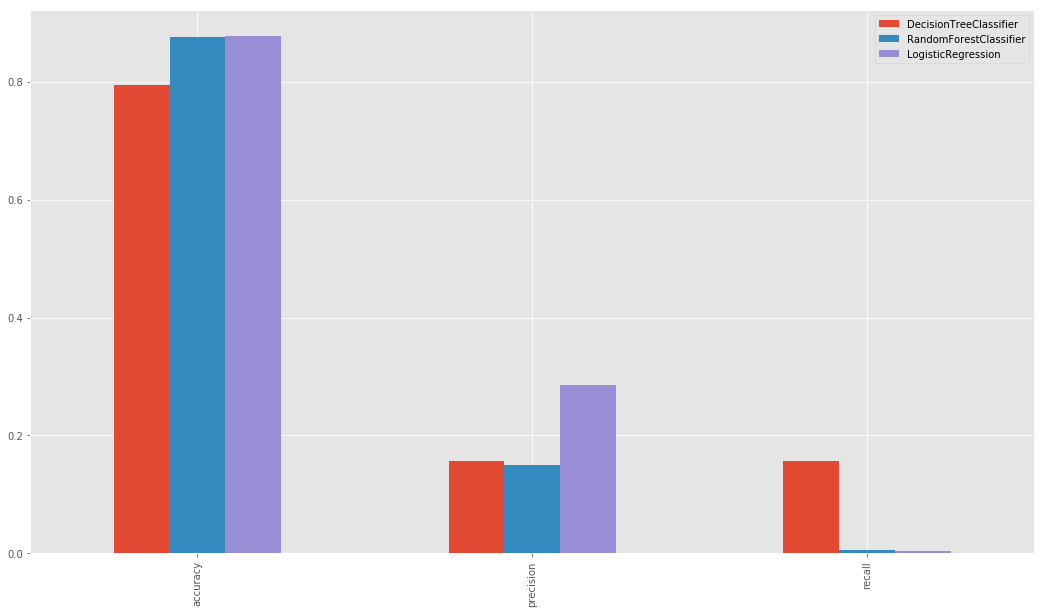

In [36]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

##  pyplot has already imported

data = {'DecisionTreeClassifier':DTC_scores, 'RandomForestClassifier':RFC_scores, 'LogisticRegression':LR_scores}
data_df = pd.DataFrame(data = data, index = ['accuracy','precision','recall'])                

_, ax = plt.subplots(figsize=(18,10)) 
data_df.plot(kind = 'bar', ax=ax)

DTC Model, roc_auc =  0.5198041012098839
RFC Model, roc_auc =  0.6020818176102324
LR Model, roc_auc =  0.6370114880583475


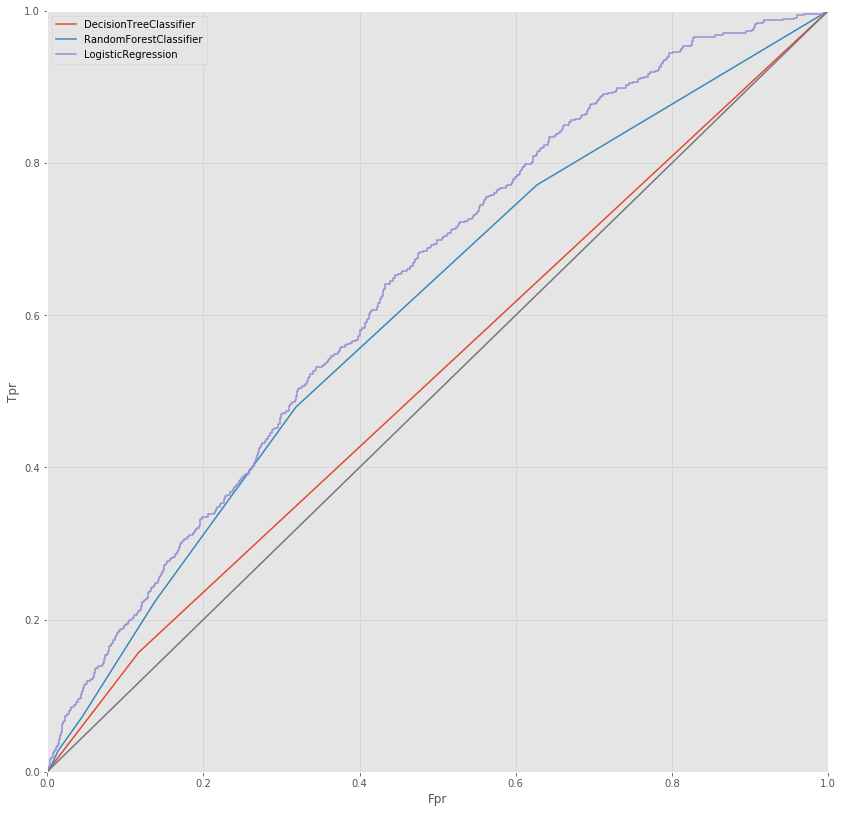

In [37]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

#print(predict_proba_DTC)
# http://structure.usc.edu/numarray/node26.html
# возьмем все строки (:) но сохраним лишь вторую колонку (1)
#print(predict_proba_DTC[:,1])
print ('DTC Model, roc_auc = ', roc_auc_score(y_test, predict_proba_DTC[:,1]))
print ('RFC Model, roc_auc = ', roc_auc_score(y_test, predict_proba_RFC[:,1]))
print ('LR Model, roc_auc = ', roc_auc_score(y_test, predict_proba_LR[:,1]))

Fpr_DTC, Tpr_DTC, threshold_DTC = roc_curve(y_test, predict_proba_DTC[:,1])
Fpr_RFC, Tpr_RFC, threshold_RFC = roc_curve(y_test, predict_proba_RFC[:,1])
Fpr_LR, Tpr_LR, threshold_LR = roc_curve(y_test, predict_proba_LR[:,1])

plt.figure(figsize=(14, 14))
plt.grid(color="lightgray")
plt.xlim((0, 1))
plt.ylim((0, 1))

plt.plot(Fpr_DTC, Tpr_DTC)
plt.plot(Fpr_RFC, Tpr_RFC)
plt.plot(Fpr_LR, Tpr_LR)
plt.plot([0, 1], [0, 1]) # x1=0,x2=1; y1=0,y2=1

plt.ylabel('Tpr')
plt.xlabel('Fpr')
plt.legend(['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression'],loc='best')
plt.show()

In [38]:
#from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here

from sklearn.model_selection import cross_val_score #'cos cross_validation is deprecated
#cross_val_score?
# cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
# http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

scoring='roc_auc'
cv = 10

model = DecisionTreeClassifier()
mean_cv_dtc = cross_val_score(model,X,y,scoring=scoring,cv=cv).mean()

model = RandomForestClassifier()
mean_cv_rfc = cross_val_score(model,X,y,scoring=scoring,cv=cv).mean()

model = LogisticRegression()
mean_cv_lr = cross_val_score(model,X,y,scoring=scoring,cv=cv).mean()

print ('среднее значение ROC_AUC для моделей\n')
print ('DecisionTreeClassifier:', mean_cv_dtc)
print ('RandomForestClassifier:', mean_cv_rfc)
print ('LogisticRegression:', mean_cv_lr)

среднее значение ROC_AUC для моделей

DecisionTreeClassifier: 0.5305562191572937
RandomForestClassifier: 0.5873063780272816
LogisticRegression: 0.6373256639076716


In [39]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# в моем случае "выигрышной" явилась модель LogisticRegression
# используем ее уже для test выборки

bestmodel = LogisticRegression()
bestmodel.fit(X, y) 
predict = bestmodel.predict(X_test)
#predict_proba = bestmodel.predict_proba(X_test)

print('accuracy: ', accuracy_score(y_test, predict))
print('precision', precision_score(y_test, predict))
print('recall:', recall_score(y_test, predict))

accuracy:  0.8782570615283556
precision 0.3333333333333333
recall: 0.0018018018018018018


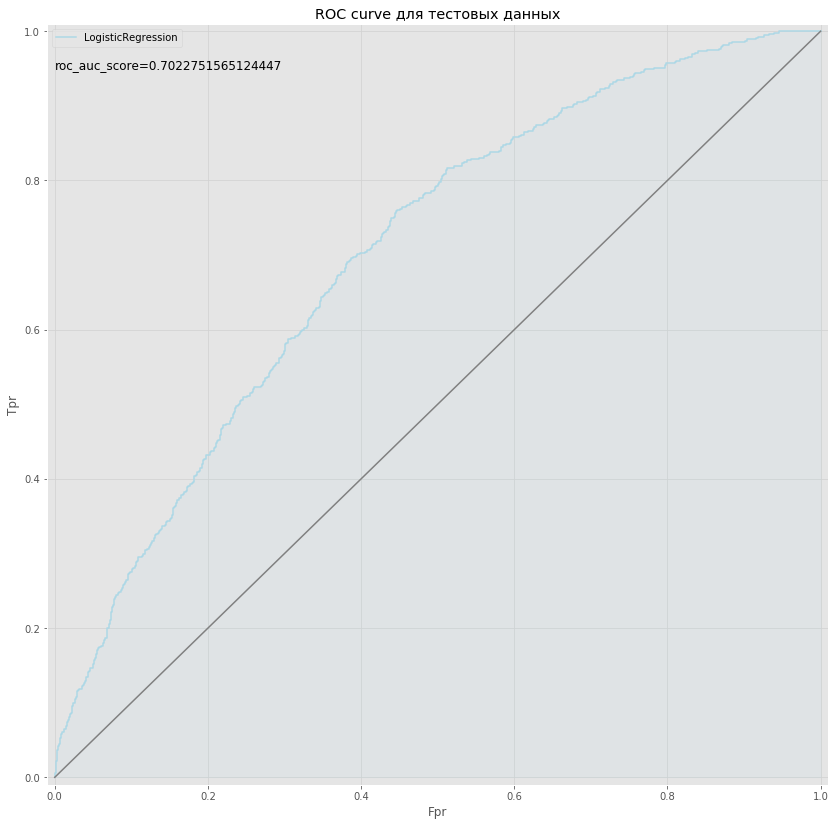

In [61]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

predict_proba = bestmodel.predict_proba(X_test)
Fpr, Tpr, threshold = roc_curve(y_test, predict_proba[:,1])
score=roc_auc_score(y_test, predict_proba[:,1])

plt.figure(figsize=(14, 14))
plt.grid(color="lightgray")
plt.xlim((-.01, 1.01))
plt.ylim((-.01, 1.01))

plt.plot(Fpr, Tpr, color="lightblue")
plt.fill_between(Fpr, Tpr,alpha=0.1, color="lightblue")
plt.plot([0, 1], [0, 1], color="gray")

plt.xlabel('Fpr')
plt.ylabel('Tpr')

plt.text(0, 0.95,fontsize=12,s="roc_auc_score="+str(score))
plt.legend(['LogisticRegression'],loc='best')
plt.title('ROC curve для тестовых данных')

plt.show()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [44]:
### И далее ;)